## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[14, 31, 82],
       [ 7, 24, 38],
       [27, 77, 83],
       [18, 42, 57],
       [58, 76, 78],
       [ 1, 12, 99]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([14, 31, 82]), array([ 7, 24, 38]))

The lowest card in the game is

In [5]:
np.min(cards)

1

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([181.,   0.,   0., 152.,   0.,   0.,   0., 140.,   0.,   0.,   0.,
         97.,   0.,   0.,  79.,   0.,   0.,   0.,  78.,   0.,   0.,   0.,
         60.,   0.,   0.,  37.,   0.,   0.,   0.,  31.,   0.,   0.,   0.,
         25.,   0.,   0.,   0.,  21.,   0.,   0.,  22.,   0.,   0.,   0.,
         14.,   0.,   0.,   0.,  17.,   0.,   0.,  10.,   0.,   0.,   0.,
          5.,   0.,   0.,   0.,   9.,   0.,   0.,   6.,   0.,   0.,   0.,
          6.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([ 1.  ,  1.27,  1.54,  1.81,  2.08,  2.35,  2.62,  2.89,  3.16,
         3.43,  3.7 ,  3.97,  4.24,  4.51,  4.78,  5.05,  5.32,  5.59,
         5.86,  6.13,  6.4 ,  6.67,  6.94,  7.21,  7.48,  7.75,  8.02,
         8.29,  8.56,  8.83,  9.1 ,  9.37,  9.64,  9.91, 10.18, 10.45,
        10.72, 10.99, 11.26, 11.53

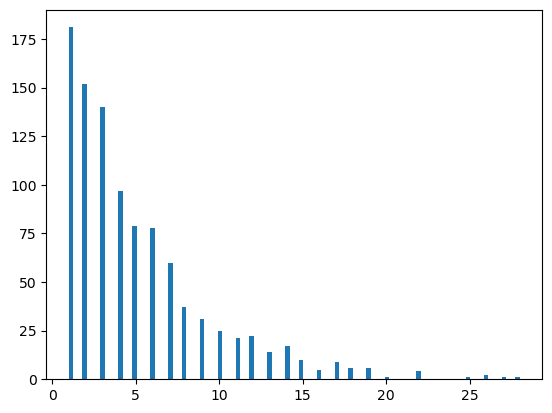

In [79]:
# To Do cell
lowest_num_insample = [np.min(sample_cards(100, 6, 3)) for i in range(1000)]
plt.hist(lowest_num_insample, bins = 100 )

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

(array([  2.,   0.,   9.,   0.,   0.,  27.,   0.,   0.,  44.,   0.,  78.,
          0.,   0.,  83.,   0.,   0.,  94.,   0., 114.,   0.,   0.,  92.,
          0.,   0.,  78.,   0.,   0.,  80.,   0.,  54.,   0.,   0.,  46.,
          0.,   0.,  43.,   0.,  42.,   0.,   0.,  29.,   0.,   0.,  16.,
          0.,  12.,   0.,   0.,  15.,   0.,   0.,  14.,   0.,   0.,   6.,
          0.,   6.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   3.,   0.,
          0.,   1.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 8.  ,  8.37,  8.74,  9.11,  9.48,  9.85, 10.22, 10.59, 10.96,
        11.33, 11.7 , 12.07, 12.44, 12.81, 13.18, 13.55, 13.92, 14.29,
        14.66, 15.03, 15.4 , 15.77, 16.14, 16.51, 16.88, 17.25, 17.62,
        17.99, 18.36, 18.73, 19.1 , 19.47, 19.84, 20.21, 20.58, 20.95,
        21.32, 21.69, 22.06, 22.43

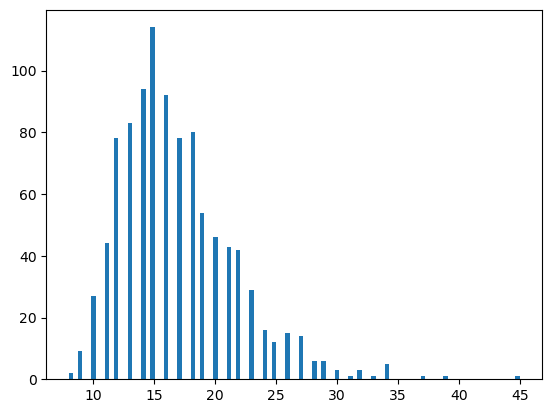

In [8]:
# To Do cell
largets_gaps_all = [np.max(np.diff(np.sort(sample_cards(100, 6, 3).flatten()))) for i in range(1000) ] 
plt.hist(largets_gaps_all , bins = 100)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

the mean is  21.088


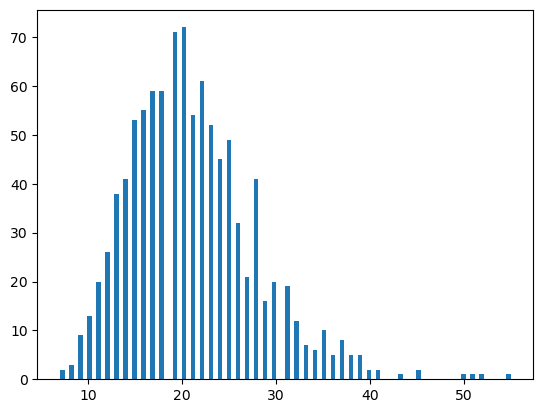

In [9]:
# To Do cell
def largest_gap_different(N,n,k):
    demo = sample_cards(N,n,k)
    # Create a 3x1 column of zeros
    zero_column = np.zeros((3, 1))
    # sort the demo 
    demo_all_sorted = np.sort(demo.ravel())
    max_diff = 0
    array_diff = np.empty((3, 1))
    # find the largest gap in the demo in two different hand
    for i in range(len(demo_all_sorted)-1):
            diff = demo_all_sorted[i+1] - demo_all_sorted[i]
            positions = (i, i+1)
            elements_to_add = np.array([[diff], [i], [i+1]])
            array_diff = np.hstack((array_diff, elements_to_add))
            
    diff_position_array = array_diff.astype(int)
    for i in range(len(diff_position_array)):
        max_diff = max(diff_position_array[0])
        max_diff_posi = np.where(diff_position_array[0,:] == max_diff)
        # the index of will be (0,i). In sorted array, index is (i-1,i)
        index_l = int(max_diff_posi[0][0])
        index_f = index_l-1
        # now according to index, find the exact number's position in origional matrix
        n1 = demo_all_sorted[index_f]
        p1 = np.where(demo == n1)[0]
        n2 = demo_all_sorted[index_l]
        p2 = np.where(demo == n2)[0]
        # check if they are in the same person hand, yes next largest difference until in different hand
        if p1 == p2 : 
            # replace the same person card's column with [0,0,0]
            diff_position_array[:, index_l:index_l+1] = zero_column
        else: 
            break
    
    return max_diff
        
    
largets_gaps_diff_all = [largest_gap_different(100,4,3) for i in range(1000)] 

plt.hist(largets_gaps_diff_all , bins = 100 )
print("the mean is ",np.mean(largets_gaps_diff_all))




How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?


when number of cards increases, the mean increases. \
when player number increases,the mean decreases. \
when n gets bigger, the mean decreases

the mean is  9.355
the mean is  20.57
the mean is  13.075


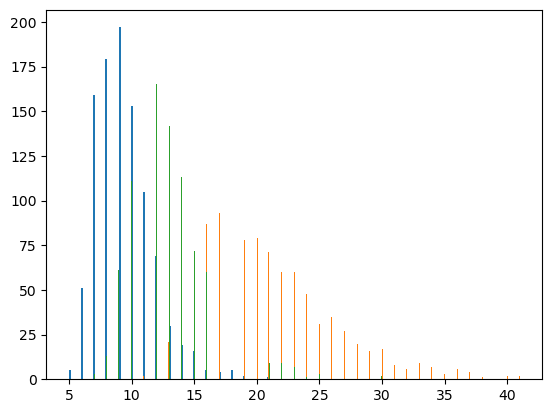

In [10]:
# To Do cell
# blue distribution
largets_gaps_diff_all = [largest_gap_different(100,12,3) for i in range(1000)]
plt.hist(largets_gaps_diff_all ,bins = 100 )
print("the mean is ",np.mean(largets_gaps_diff_all))

# orange distribution
largets_gaps_diff_all = [largest_gap_different(200,12,3) for i in range(1000)]
plt.hist(largets_gaps_diff_all ,bins = 400 )
print("the mean is ",np.mean(largets_gaps_diff_all))

# green distribution
largets_gaps_diff_all = [largest_gap_different(200,12,5) for i in range(1000)]
plt.hist(largets_gaps_diff_all ,bins = 400 )
print("the mean is ",np.mean(largets_gaps_diff_all))



### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

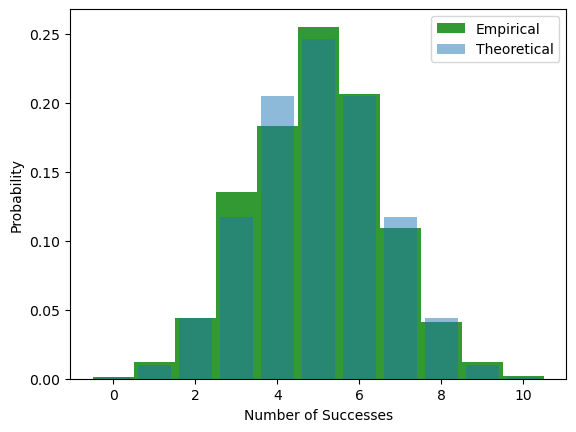

In [14]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def one_sample_game(p):
    return 1 if np.random.rand() < p else 0

# Parameters
p = 0.5
n = 10

count_success = []

for i in range(1000):
    total_success_one = sum(one_sample_game(p) for o in range(n))
    count_success.append(total_success_one)
    
plt.hist(count_success, bins=range(n+2), align='left', density=True, alpha=0.8, label='Empirical',color = "green")


x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p), align='center', alpha=0.5, label='Theoretical' )
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

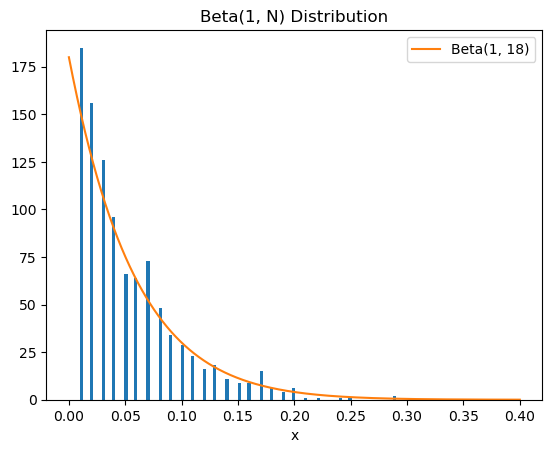

In [229]:
# To Do cell
from scipy.stats import beta

# Define the parameters
alpha = 1
beta_param = 18

# Generate x values
x = np.linspace(0,0.4, 1000)

# Compute the PDF values
pdf_values = beta.pdf(x, alpha, beta_param)

# Compare with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards(100, 6, 3)) for i in range(1000)]

# Plot
plt.hist(np.array(lowest_num_insample)/100 ,bins = 100)
plt.plot(x, pdf_values*10, label=f'Beta({alpha}, {beta_param})')
plt.xlabel('x')
plt.title('Beta(1, N) Distribution')
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

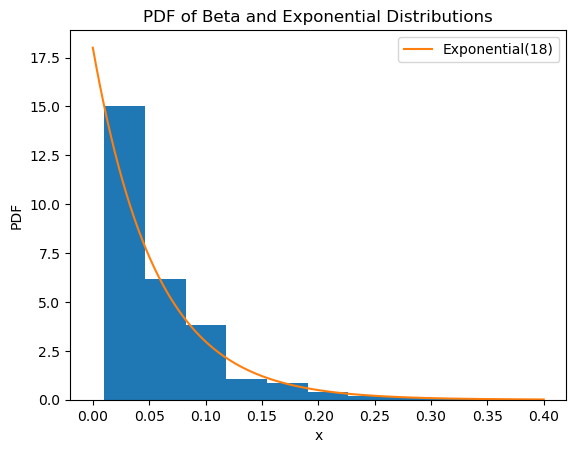

In [105]:
# To Do cell
from scipy.stats import expon


# Define the parameters for the Exponential distribution
n = 6  
k = 3 
lambda_param = n*k

# transform with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards(100, 6, 3)) for i in range(1000)]
transformed = -np.log(1 - np.array(lowest_num_insample)/100)

# Generate x values and pdf
x_exp = np.linspace(0, 0.4, 1000)
pdf_values_exp = expon.pdf(x_exp, scale=1/lambda_param)

# plot 
plt.hist(transformed,density= True)
plt.plot(x_exp, pdf_values_exp, label=f'Exponential({lambda_param})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of Beta and Exponential Distributions')
plt.legend()
plt.show()





### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

we see that when $n * k << N$, the the cases of sampling with and without replacement lead to similar results. The two sampling strategies will also lead to similar results.


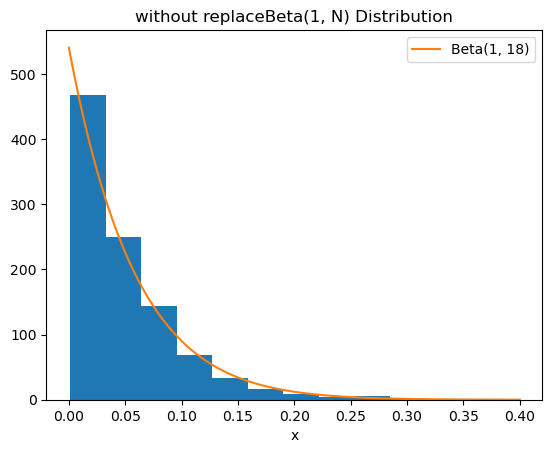

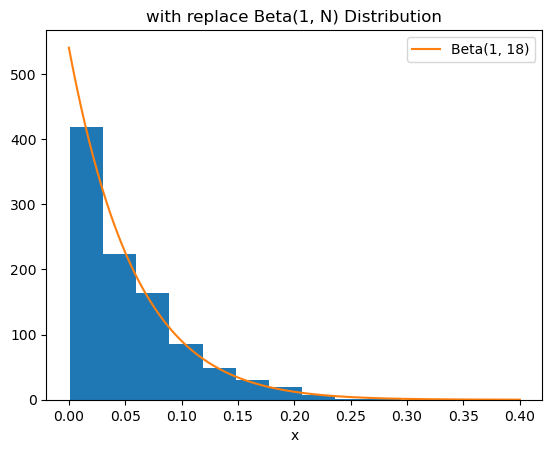

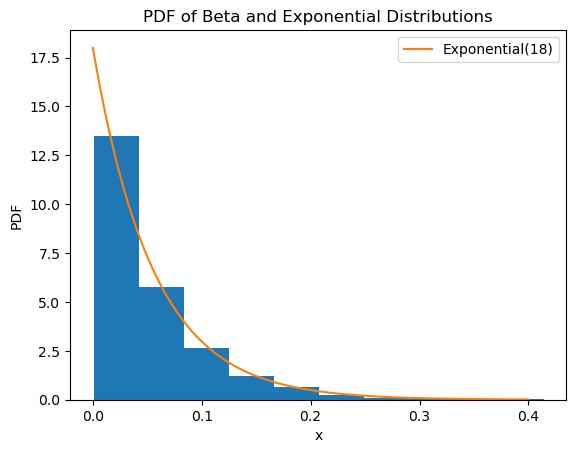

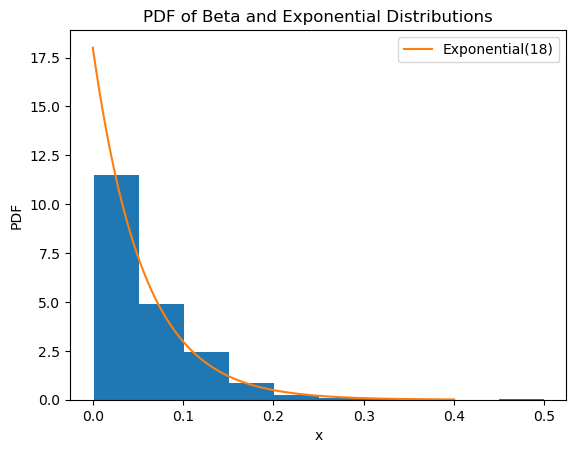

In [238]:
# To Do cell
def sample_cards_with_replace(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards


from scipy.stats import beta,expon

# beta without replacement 
# Define the parameters
alpha = 1
beta_param = 18

# Generate x values
x = np.linspace(0,0.4, 1000)

# Compute the PDF values
pdf_values = beta.pdf(x, alpha, beta_param)

# Compare with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards(1000, 6, 3)) for i in range(1000)]

# Plot
plt.hist(np.array(lowest_num_insample)/1000)
plt.plot(x, pdf_values*30, label=f'Beta({alpha}, {beta_param})')
plt.xlabel('x')
plt.title('without replaceBeta(1, N) Distribution')
plt.legend()
plt.show()

# beta with replacement 
alpha = 1
beta_param = 18

# Generate x values
x = np.linspace(0,0.4, 1000)

# Compute the PDF values
pdf_values = beta.pdf(x, alpha, beta_param)

# Compare with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards_with_replace(1000, 6, 3)) for i in range(1000)]

# Plot
plt.hist(np.array(lowest_num_insample)/1000)
plt.plot(x, pdf_values*30, label=f'Beta({alpha}, {beta_param})')
plt.xlabel('x')
plt.title('with replace Beta(1, N) Distribution')
plt.legend()
plt.show()


# Exponential without replace 
# Define the parameters for the Exponential distribution
n = 6  
k = 3 
lambda_param = n*k

# transform with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards(1000, 6, 3)) for i in range(1000)]
transformed = -np.log(1 - np.array(lowest_num_insample)/1000)

# Generate x values and pdf
x_exp = np.linspace(0, 0.4, 1000)
pdf_values_exp = expon.pdf(x_exp, scale=1/lambda_param)

# plot 
plt.hist(transformed,density= True)
plt.plot(x_exp, pdf_values_exp, label=f'Exponential({lambda_param})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of Beta and Exponential Distributions')
plt.legend()
plt.show()

# Exponential with replace 
# Define the parameters for the Exponential distribution
n = 6  
k = 3 
lambda_param = n*k

# transform with the lowest number in sample 
lowest_num_insample = [np.min(sample_cards_with_replace(1000, 6, 3)) for i in range(1000)]
transformed = -np.log(1 - np.array(lowest_num_insample)/1000)

# Generate x values and pdf
x_exp = np.linspace(0, 0.4, 1000)
pdf_values_exp = expon.pdf(x_exp, scale=1/lambda_param)

# plot 
plt.hist(transformed,density= True)
plt.plot(x_exp, pdf_values_exp, label=f'Exponential({lambda_param})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of Beta and Exponential Distributions')
plt.legend()
plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Xiaoyan Wei , github name : wagswei
- Member No2: 
- Member No3: